# Основы анализа данных в Python

*Алла Тамбовцева*

## Основные законы статистики: закон больших чисел и центральная предельная теорема

Импортируем необходимые библиотеки и модули:

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

Перейдём к визуализации действия основных статистических законов.

### Закон больших чисел

> С увеличением размера выборки $n$ (в идеале – при стремлении $n$ к бесконечности), среднее значение выборки $\bar{x}$ становится ближе к среднему значению генеральной совокупности:

$$
\lim_{n\to\infty}\sum_{i=1}^n\frac{x_i}{n} = \bar{x}.
$$



Для визуализации этого закона будем извлекать выборки разного размера из нормального распределения со средним значением 168 и стандартным отклонением 2. Вспомним, как выглядит плотность такого распределения:

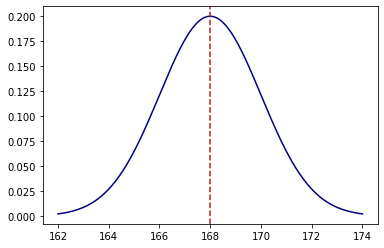

In [2]:
mu = 168
sigma = 2

# linspace() создает массив значений от start до stop из num = 1000 значений, равноудаленных друг от друга
# norm.pdf() вычисляет значения функции плотности в каждой точке х
# отрисовываем график по точкам и добавляем вертикальную линию x = 168

x = np.linspace(start = mu - 3 * sigma, stop = mu + 3 * sigma, num = 1000)
plt.plot(x, st.norm.pdf(x, mu, sigma), color = "navy");
plt.axvline(x = 168, color = 'firebrick', linestyle = "dashed");

Теперь будем «дёргать» выборки из нормального распределения $N(168, \sigma=2)$. Содержательно, можно считать, например, что мы будем извлекать выборки из большой генеральной совокупности, которая представляет собой набор значений роста женщин в сантиметрах. Начнём с небольшой выборки в 10 наблюдений. Для этого нам понадобится функция `norm.rvs()` из модуля `stats` внутри `scipy`, которая используется для генерации случайных (псевдослучайных) выборок из нормального распределения:

In [3]:
# norm.rvs(): название распределения + random variable sample
# loc: математическое ожидание
# scale: стандартное отклонение
# random_state: закрепляем для воспроизводимости – чтобы у всех были одинаковые выборки

sample01 = st.norm.rvs(loc = 168, scale = 2, size = 10, random_state = 800)
print(sample01)

[167.59930829 166.55450078 165.98712705 167.12926478 169.86067297
 166.61057297 161.41621564 166.72202621 168.22877754 168.40813973]


Посчитаем среднее полученной выборки:

In [4]:
print("N = 10", "Mean =", sample01.mean())

N = 10 Mean = 166.85166059439118


Выборочное среднее отличается от среднего генеральной совокупности на примерно на 1.15. Проверим, что будет происходить с увеличением объёма выборки. Возьмём выборку объёма 100 и выборку объёма 2000 из того же нормального распределения.

In [5]:
# n = 100

np.random.seed(800)
sample02 = st.norm.rvs(loc = 168, scale = 2, size = 100, random_state = 800)
print("N = 100", "Mean =", sample02.mean())

N = 100 Mean = 167.60198437638792


In [6]:
# n = 2000

np.random.seed(800)
sample03 = st.norm.rvs(loc = 168, scale = 2, size = 2000, random_state = 800)
print("N = 2000", "Mean =", sample03.mean())

N = 2000 Mean = 167.99987039132859


Как можно заметить, действительно, с увеличением объёма выборки, выборочное среднее меньше отличается от среднего генеральной совокупности, в данном случае от среднего 168 нормальной случайной величины. Попробуем поэкспериментировать – извлечём выборки разного размера от 10 до 10000 наблюдений из нормального распределения $N(168, \sigma=2)$, зафиксируем выборочные средние и посмотрим на их изменения при увеличении размера выборки.

In [7]:
# извлекаем выборки размера от 10 до 10000 с шагом 10
# по каждой считаем среднее и записываем его в список means

means = []

for k in range(10, 10001, 10):
    samp = st.norm.rvs(loc = 168, scale = 2, size = k)
    means.append(samp.mean())

Чтобы понять, что происходит, построим график – по оси X будем отмечать объём выборки, а по оси Y – выборочное среднее:

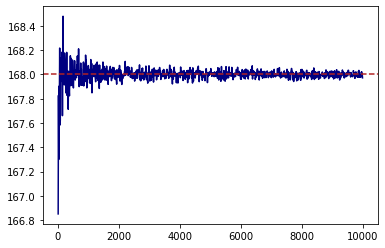

In [8]:
# axhline – горизонтальная линия

plt.plot(range(10, 10001, 10), means, color = "navy");
plt.axhline(y = 168, color = 'firebrick', linestyle = "dashed");

Возможно, не самый показательный график, но, тем не менее, по нему видно, что при увеличении объёма выборки выборочные средние колеблются вокруг среднего генеральной совокупности с меньшей амплитудой. Ещё лучше этот эффект можно увидеть на гистограммах. Давайте ещё поэкспериментируем: 

* извлечём 100 выборок объёма 10
* извлечём 100 выборок объёма 100
* извлечём 100 выборок объёма 1000

и посмотрим на то, насколько выборочные средние отличаются от среднего генеральной совокупности 168 при каждом объёме выборки. 

Сгенерируем 100 выборок объёма $n = 10$, посчитаем по каждой среднее и сохраним средние в список `means10`:

In [9]:
means10 = []
for i in range(100):
    samp = st.norm.rvs(loc = 168, scale = 2, size = 10)
    means10.append(samp.mean())

Построим гистограмму для средних:

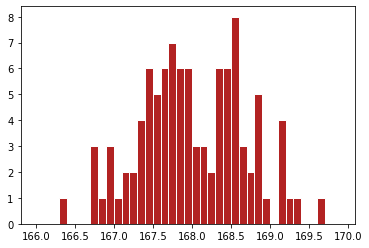

In [10]:
# для удобства последующих сравнений:
# range = (166, 170) – границы по оси x
# bins = np.arange(166, 170, 0.1) – границы столбцов
# массив от 166 до 170 с шагом 0.1

plt.hist(means10, color = "firebrick", edgecolor = "white", 
         range = (166, 170), bins = np.arange(166, 170, 0.1));

Итак, в случае, если выборки маленького размера $n=10$, средние по таким выборкам получаются довольно разнообразными – примерно от 166.5 до 169.5. То есть, теоретически, выборочные средние могут удаляться от среднего генеральной совокупности 168 примерно на 1.5.

Попробуем изучить выборки большего размера. Сгенерируем 100 выборок объёма $n=100$, посчитаем по каждой среднее и сохраним средние в список `means100`:

In [11]:
means100 = []
for i in range(100):
    samp = st.norm.rvs(loc = 168, scale = 2, size = 100)
    means100.append(samp.mean())

Снова построим гистограмму для средних:

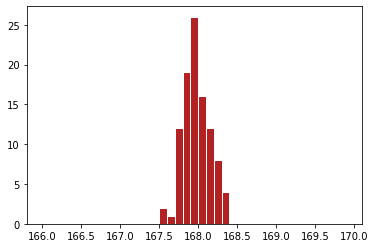

In [12]:
plt.hist(means100, color = "firebrick", edgecolor = "white", 
         range = (166, 170), bins = np.arange(166, 170, 0.1));

Тут уже разброс выборочных средних явно меньше (специально оставили те же границы значений для наглядности), выборочные средние более скучены вокруг значения 168, они лежат в интервале примерно от 167.5 до 168.5. То есть, максимальное отклонение выборочного среднего от среднего генеральной совокупности уже не 1.5, а примерно 0.5. Закон больших чисел работает! Чтобы окончательно в этом убедиться, возьмём выборки ещё большего размера. 

Сгенерируем 100 выборок объёма $n=1000$, посчитаем по каждой среднее и сохраним средние в список `means1000`:

In [13]:
means1000 = []
for i in range(100):
    samp = st.norm.rvs(loc = 168, scale = 2, size = 1000)
    means1000.append(samp.mean())

И вновь строим гистограмму:

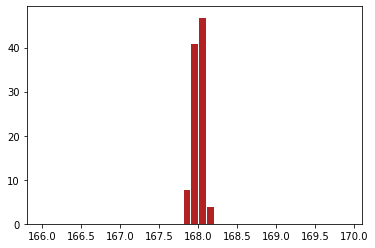

In [14]:
plt.hist(means1000, color = "firebrick", edgecolor = "white", 
         range = (166, 170), bins = np.arange(166, 170, 0.1));

Гистограмма получилась довольно узкой – выборочные средние значения очень сильно сконцентрированы вокруг 168, разброс значений маленький, от 167.75 до 168.25. Другими словами, увеличив объём выборок ещё в десять раз, мы пришли к выборкам, средние значения которых будут отличаться от среднего генеральной совокупности 168 совсем на чуть-чуть, не больше, чем на 0.25. Закон больших чисел, действительно, работает, мы убедились в этом посредством небольшой серии компьютерных симуляций.

### Центральная предельная теорема

> Пусть у нас есть генеральная совокупность со средним значением $\mu$ и стандартным отклонением $\sigma$. Если мы извлечем из этой совокупности все возможные выборки достаточно большого размера $n$ ($n \geqslant30$) и посчитаем по каждой выборке среднее значение, то эти средние значения будут примерно нормально распределены со средним $\mu$ и стандартным отклонением $\frac{\sigma}{\sqrt{n}}$.


Почему эта теорема очень мощная и при этом прикладная? Распределение генеральной совокупности нам в реальной жизни часто неизвестно, оно может быть каким угодно, а вот с выборочными средними мы сталкиваемся постоянно. И эта теорема как раз говорит нам о том, что даже если мы не знаем вид распределения генеральной совокупности, про распределение средних мы всё равно знаем многое – оно всегда нормальное и с фиксированными параметрами.

Давайте представим себе генеральную совокупность, распределение которой точно не похоже на нормальное. Возьмём какое-нибудь экзотическое [распределение Парето](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D0%B0%D1%80%D0%B5%D1%82%D0%BE) (для социально-экономических наук, конечно, не экзотическое, просто мы его не встречали на других курсах, близко к экспоненциальному). Посмотрим, как выглядит плотность распределения Парето с коэффициентом масштаба равным 1 и $k = 3$ (специфические параметры распределения):

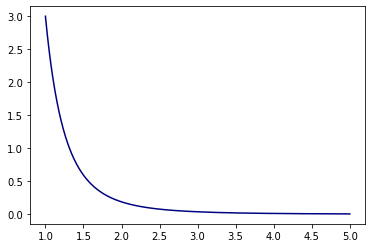

In [15]:
x = np.linspace(start = 1, stop = 5, num = 1000)
plt.plot(x, st.pareto.pdf(x, b = 3), color = "navy");

Действительно, судя по плотности, на нормальное распределение Парето точно не похоже. А что будет, если мы из него извлечём много случайных выборок и изучим распределение выборочных средних? Генерировать выборки мы уже умеем – извлечём из распределения Парето (генеральной совокупности, имеющей такое распределение) 3000 выборок объёма $n = 900$ и сохраним среднее по каждой выборке в список `p_means`:

In [16]:
# еще один способ – 

pmeans = []

for i in range(3000):
    samp = st.pareto.rvs(3, size = 900)
    pmeans.append(samp.mean())

Построим гистограмму для выборочных средних `pmeans`:

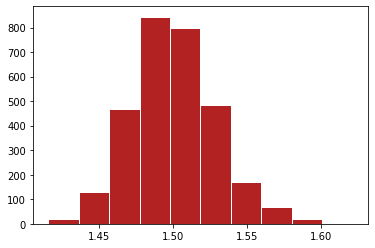

In [17]:
plt.hist(pmeans, color = "firebrick", edgecolor = "white");

Магия! Может, не идеально нормальное распределение, но очень близко к нему. Центральная предельная теорема действует! Осталось проверить, правда ли, что среднее по набору выборочных средних близко к среднему генеральной совокупности, а стандартное отклонение по набору выборочных средних примерно равно стандартному отклонению генеральной совокупности, поделённому на корень из объёма выборок.

Математическое ожидание распределения Парето с заданными параметрами равно 1.5, стандартное отклонение равно 0.87. Эти значения можно получить по свойствам и формулам, а можно извлечь из Python:

In [18]:
# моменты – математическое ожидание m и дисперсия v
# для случайной величины с распределением Парето с k = 3

mean, var = st.pareto.stats(3, moments = 'mv')
print("Mean:", mean, "Variance:", var, "St Dev:", np.sqrt(var).round(2))

Mean: 1.5 Variance: 0.75 St Dev: 0.87


Проверим, чему равно среднее по массиву выборочных средних `pmeans`, по которому мы построили гистограмму выше:

In [19]:
print(np.mean(pmeans))

1.5004160213926232


Почти 1.5! Проверим, чему равно стандартное отклонение:

In [20]:
print(np.std(pmeans))

0.028291541267660973


Согласно центральной предельной теореме, это стандарное отклонение должно примерно совпадать со стандартным отклонением генеральной совокупности, делённым на корень из объёма выборки. Посчитаем и сравним (мы извлекали выборки с $n = 900$):

In [21]:
print(np.sqrt(var) / np.sqrt(900))

0.028867513459481287


Почти совпало! Центральная предельная теорема тоже работает! 